In [4]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import plot_model
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.transform import resize
from skimage import io, color
import warnings
import cv2

In [ ]:
#Pre_Process_For Direct SEM Images


In [8]:
reference_img = 'ref/ref23.png'
reference_img_tmp = 'tmp/ref.png'
size = (400,400)
rgb = io.imread(reference_img)
resized_image = resize(rgb, size)
rescaled_image = 255 * resized_image
final_image = rescaled_image.astype(np.uint8)
io.imsave(reference_img_tmp,final_image)


/Users/tsunami/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/tsunami/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [9]:
dir_sem = 'sem/' 
sem_input = 'AI-01.jpg'
sem_input_tmp = 'tmp/sem.png'
size = (400,400)
rgb = io.imread(dir_sem+sem_input)
resized_image = resize(rgb, size)
rescaled_image = 255 * resized_image
final_image = rescaled_image.astype(np.uint8)
io.imsave(sem_input_tmp,final_image)

/Users/tsunami/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/tsunami/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


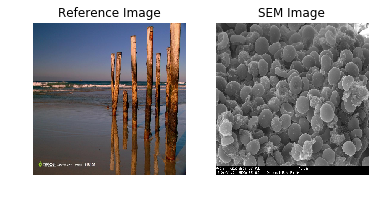

In [11]:
fig = plt.figure()

a=fig.add_subplot(1,2,1)
img_rslt=mpimg.imread(reference_img_tmp)
imgplot= plt.imshow(img_rslt)
a.set_title('Reference Image')
a.axis('off')
a=fig.add_subplot(1,2,2)
img_gray=mpimg.imread(sem_input_tmp)
imgplot= plt.imshow(img_gray, cmap='gray')
a.set_title('SEM Image')

a.axis('off')
plt.show()

In [12]:
# Get images

reference_image = img_to_array(load_img(reference_img_tmp))
reference_image = np.array(reference_image, dtype=float)
sem_image = img_to_array(load_img(sem_input_tmp))
sem_image = np.array(sem_image, dtype=float)


In [13]:
X = rgb2lab(1.0/255*reference_image)[:,:,0]
Y = rgb2lab(1.0/255*reference_image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)
## TO be Draw
X_sem = rgb2lab(1.0/255*sem_image)[:,:,0]
#X_style = style_image.reshape((image.shape[0] * image.shape[1], 3))
X_sem = X_sem.reshape(1, 400, 400, 1)



In [14]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')
#plot_model(model, to_file='model.png')

In [16]:
history = model.fit(x=X, 
    y=Y,
    batch_size=1,
    epochs=500)

Instructions for updating:
Use tf.cast instead.
Epoch 1/500
1/1 [==============================] - 1s 898ms/step - loss: 0.2982
Epoch 2/500
1/1 [==============================] - 0s 470ms/step - loss: 0.7840
Epoch 3/500
1/1 [==============================] - 0s 306ms/step - loss: 0.0297
Epoch 4/500
1/1 [==============================] - 0s 268ms/step - loss: 0.0237
Epoch 5/500
1/1 [==============================] - 0s 310ms/step - loss: 0.0134
Epoch 6/500
1/1 [==============================] - 0s 330ms/step - loss: 0.0119
Epoch 7/500
1/1 [==============================] - 0s 312ms/step - loss: 0.0113
Epoch 8/500
1/1 [==============================] - 0s 284ms/step - loss: 0.0110
Epoch 9/500
1/1 [==============================] - 0s 303ms/step - loss: 0.0105
Epoch 10/500
1/1 [==============================] - 0s 373ms/step - loss: 0.0101
Epoch 11/500
1/1 [==============================] - 0s 457ms/step - loss: 0.0097
Epoch 12/500
1/1 [==============================] - 0s 357ms/step - lo

Epoch 99/500
1/1 [==============================] - 0s 324ms/step - loss: 0.0050
Epoch 100/500
1/1 [==============================] - 0s 306ms/step - loss: 0.0070
Epoch 101/500
1/1 [==============================] - 0s 294ms/step - loss: 0.0085
Epoch 102/500
1/1 [==============================] - 0s 283ms/step - loss: 0.0058
Epoch 103/500
1/1 [==============================] - 0s 305ms/step - loss: 0.0049
Epoch 104/500
1/1 [==============================] - 0s 289ms/step - loss: 0.0049
Epoch 105/500
1/1 [==============================] - 0s 297ms/step - loss: 0.0048
Epoch 106/500
1/1 [==============================] - 0s 311ms/step - loss: 0.0056
Epoch 107/500
1/1 [==============================] - 0s 298ms/step - loss: 0.0044
Epoch 108/500
1/1 [==============================] - 0s 278ms/step - loss: 0.0045
Epoch 109/500
1/1 [==============================] - 0s 253ms/step - loss: 0.0044
Epoch 110/500
1/1 [==============================] - 0s 315ms/step - loss: 0.0051
Epoch 111/500
1/1

Epoch 199/500
1/1 [==============================] - 0s 388ms/step - loss: 0.0047
Epoch 200/500
1/1 [==============================] - 0s 331ms/step - loss: 0.0059
Epoch 201/500
1/1 [==============================] - 0s 309ms/step - loss: 0.0059
Epoch 202/500
1/1 [==============================] - 0s 315ms/step - loss: 0.0103
Epoch 203/500
1/1 [==============================] - 0s 310ms/step - loss: 0.0070
Epoch 204/500
1/1 [==============================] - 0s 328ms/step - loss: 0.0041
Epoch 205/500
1/1 [==============================] - 0s 314ms/step - loss: 0.0034
Epoch 206/500
1/1 [==============================] - 0s 323ms/step - loss: 0.0031
Epoch 207/500
1/1 [==============================] - 0s 328ms/step - loss: 0.0030
Epoch 208/500
1/1 [==============================] - 0s 294ms/step - loss: 0.0029
Epoch 209/500
1/1 [==============================] - 0s 287ms/step - loss: 0.0029
Epoch 210/500
1/1 [==============================] - 0s 321ms/step - loss: 0.0029
Epoch 211/500
1/

Epoch 299/500
1/1 [==============================] - 0s 344ms/step - loss: 0.0023
Epoch 300/500
1/1 [==============================] - 0s 312ms/step - loss: 0.0023
Epoch 301/500
1/1 [==============================] - 0s 323ms/step - loss: 0.0025
Epoch 302/500
1/1 [==============================] - 0s 323ms/step - loss: 0.0025
Epoch 303/500
1/1 [==============================] - 0s 375ms/step - loss: 0.0043
Epoch 304/500
1/1 [==============================] - 0s 379ms/step - loss: 0.0029
Epoch 305/500
1/1 [==============================] - 0s 340ms/step - loss: 0.0027
Epoch 306/500
1/1 [==============================] - 0s 329ms/step - loss: 0.0034
Epoch 307/500
1/1 [==============================] - 0s 336ms/step - loss: 0.0074
Epoch 308/500
1/1 [==============================] - 0s 319ms/step - loss: 0.0068
Epoch 309/500
1/1 [==============================] - 0s 320ms/step - loss: 0.0098
Epoch 310/500
1/1 [==============================] - 0s 347ms/step - loss: 0.0139
Epoch 311/500
1/

Epoch 399/500
1/1 [==============================] - 0s 312ms/step - loss: 0.0023
Epoch 400/500
1/1 [==============================] - 0s 342ms/step - loss: 0.0023
Epoch 401/500
1/1 [==============================] - 0s 349ms/step - loss: 0.0024
Epoch 402/500
1/1 [==============================] - 0s 335ms/step - loss: 0.0030
Epoch 403/500
1/1 [==============================] - 0s 316ms/step - loss: 0.0023
Epoch 404/500
1/1 [==============================] - 0s 319ms/step - loss: 0.0025
Epoch 405/500
1/1 [==============================] - 0s 320ms/step - loss: 0.0021
Epoch 406/500
1/1 [==============================] - 0s 336ms/step - loss: 0.0022
Epoch 407/500
1/1 [==============================] - 0s 320ms/step - loss: 0.0029
Epoch 408/500
1/1 [==============================] - 0s 331ms/step - loss: 0.0019
Epoch 409/500
1/1 [==============================] - 0s 333ms/step - loss: 0.0022
Epoch 410/500
1/1 [==============================] - 0s 331ms/step - loss: 0.0019
Epoch 411/500
1/

Epoch 499/500
1/1 [==============================] - 0s 447ms/step - loss: 0.0020
Epoch 500/500
1/1 [==============================] - 0s 398ms/step - loss: 0.0033


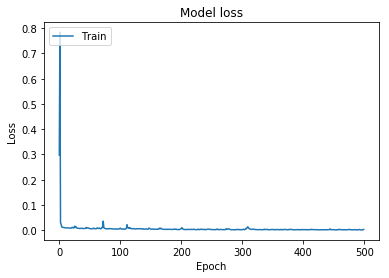

In [17]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
color_dict = {}
color_dict_max = {}
color_dict_max_ab = {}
def same_grey_same_colorize(AB, L):
    
    for i in range(L.shape[0]):
        for j in range(L.shape[1]):
            l = L[i][j]
            ab = list(map(lambda x:int(x), AB[i][j] + 128))
            if l not in color_dict:
                color_dict[l] = [[0]*256]*256
                color_dict_max[l] = 0
            color_dict[l][ab[0]][ab[1]] += 1
            if color_dict[l][ab[0]][ab[1]] > color_dict_max[l]:
                color_dict_max[l] = color_dict[l][ab[0]][ab[1]]
                color_dict_max_ab[l] = AB[i][j]
                
    for i in range(L.shape[0]):
        for j in range(L.shape[1]):
            l = L[i][j]
            AB[i][j] = color_dict_max_ab[l]
    return AB

In [19]:
#debug code
#l = np.array([[1,3,4,1],[3,4,1,3]])
#ab = np.array([[5,7,8,5],[8,9,6,7]])
#same_grey_same_colorize(ab, l)

In [20]:
print(model.evaluate(X_sem, Y, batch_size=1))

output = model.predict(X_sem)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
L = X_sem[0][:,:,0]
AB = output[0]
cur[:,:,0] = L
cur[:,:,1:] = same_grey_same_colorize(AB, L)
imsave("results_nst/"+sem_input, lab2rgb(cur))

1/1 [==============================] - 0s 167ms/step
0.017338665202260017


/Users/tsunami/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:997: UserWarning: Color data out of range: Z < 0 in 45 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
/Users/tsunami/anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


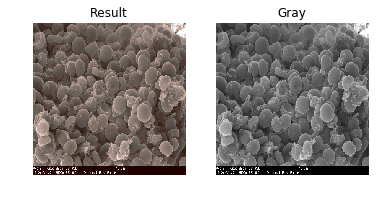

In [22]:
fig = plt.figure()

a=fig.add_subplot(1,2,1)
img_rslt=mpimg.imread('results_nst/'+sem_input)
imgplot= plt.imshow(img_rslt)
a.set_title('Result')
a.axis('off')
a=fig.add_subplot(1,2,2)
imgplot= plt.imshow(sem_image/255,cmap='gray')
a.set_title('Gray')

a.axis('off')
plt.show()